In [66]:
from pathlib import Path
from data_handler import DukasCopyDataHandler
from strategy import SessionTime, TradeSetup, Trade, TradingStrategy
import market_analysis
from util_volume_analysis import analyze_volume
import backtest
import pandas as pd

In [67]:
file_paths = [
    "/Users/timoehlert 1/Desktop/Code/ASIM_TSMOM_Trading_Strategy/datasets/XAUUSD_Candlestick_1_M_BID_01.01.2022-31.07.2022.csv",
    "/Users/timoehlert 1/Desktop/Code/ASIM_TSMOM_Trading_Strategy/datasets/XAUUSD_Candlestick_1_M_BID_01.08.2022-31.12.2022.csv",
    "/Users/timoehlert 1/Desktop/Code/ASIM_TSMOM_Trading_Strategy/datasets/XAUUSD_Candlestick_1_M_BID_01.01.2023-31.07.2023.csv",
    "/Users/timoehlert 1/Desktop/Code/ASIM_TSMOM_Trading_Strategy/datasets/XAUUSD_Candlestick_1_M_BID_01.08.2023-31.12.2023.csv",
    "/Users/timoehlert 1/Desktop/Code/ASIM_TSMOM_Trading_Strategy/datasets/XAUUSD_Candlestick_1_M_BID_01.01.2024-24.11.2024.csv"
]

data_handler = DukasCopyDataHandler()
all_dataframes = []  # Liste zum Speichern der einzelnen DataFrames

for file_path in file_paths:
    try:
        print(f"Lade Datei: {file_path}")
        processed_data = data_handler.load_data(file_path)
        all_dataframes.append(processed_data)  # Speichere den DataFrame
        print(f"Datei {file_path} erfolgreich geladen. Zeilen: {len(processed_data)}")
    except Exception as e:
        print(f"Fehler beim Laden von {file_path}: {e}")

# Kombiniere alle DataFrames zu einem großen DataFrame
if all_dataframes:
    combined_data = pd.concat(all_dataframes).sort_index()
    print(f"Alle Dateien kombiniert. Gesamtzeilen: {len(combined_data)}")
else:
    print("Keine Daten verfügbar.")


Lade Datei: /Users/timoehlert 1/Desktop/Code/ASIM_TSMOM_Trading_Strategy/datasets/XAUUSD_Candlestick_1_M_BID_01.01.2022-31.07.2022.csv
Datei /Users/timoehlert 1/Desktop/Code/ASIM_TSMOM_Trading_Strategy/datasets/XAUUSD_Candlestick_1_M_BID_01.01.2022-31.07.2022.csv erfolgreich geladen. Zeilen: 303840
Lade Datei: /Users/timoehlert 1/Desktop/Code/ASIM_TSMOM_Trading_Strategy/datasets/XAUUSD_Candlestick_1_M_BID_01.08.2022-31.12.2022.csv
Datei /Users/timoehlert 1/Desktop/Code/ASIM_TSMOM_Trading_Strategy/datasets/XAUUSD_Candlestick_1_M_BID_01.08.2022-31.12.2022.csv erfolgreich geladen. Zeilen: 218880
Lade Datei: /Users/timoehlert 1/Desktop/Code/ASIM_TSMOM_Trading_Strategy/datasets/XAUUSD_Candlestick_1_M_BID_01.01.2023-31.07.2023.csv
Datei /Users/timoehlert 1/Desktop/Code/ASIM_TSMOM_Trading_Strategy/datasets/XAUUSD_Candlestick_1_M_BID_01.01.2023-31.07.2023.csv erfolgreich geladen. Zeilen: 303840
Lade Datei: /Users/timoehlert 1/Desktop/Code/ASIM_TSMOM_Trading_Strategy/datasets/XAUUSD_Candlestick

In [68]:
# Daten laden und verarbeiten
processed_data = combined_data
strategy_data = processed_data.copy()


In [69]:
# Strategie initialisieren
strategy = TradingStrategy(strategy_data, risk_percent=0.01)


In [70]:
# Signale generieren
strategy.generate_signals()


In [71]:
# Trades simulieren
strategy.simulate_trades()


In [72]:
# Handelsdaten abrufen
trade_data = strategy.get_trade_data()

# Beispiel: Erste 5 Trades anzeigen
print(trade_data.head())

# Statistiken: Gesamtgewinn/Verlust, Anzahl abgeschlossener Trades, durchschnittliches R-Multiple
print(f"Total PnL: {trade_data['pnl'].sum()}")
print(f"Total Trades: {len(trade_data)}")
print(f"Average R-Multiple: {trade_data['r_multiple'].mean()}")


                 entry_time                 exit_time  entry_price  \
0 2022-01-03 00:00:00+00:00 2022-01-03 08:00:00+00:00     1828.188   
1 2022-01-03 08:00:00+00:00 2022-01-03 13:59:00+00:00     1823.588   
2 2022-01-03 13:00:00+00:00 2022-01-03 14:33:00+00:00     1821.848   
3 2022-01-04 00:00:00+00:00 2022-01-04 08:00:00+00:00     1803.664   
4 2022-01-04 08:00:00+00:00 2022-01-04 16:00:00+00:00     1805.618   

   exit_price direction session  attempt         status     pnl  \
0    1823.588     short   asian        1  session_close   4.600   
1    1806.088     short  london        1         tp_hit  17.500   
2    1804.348     short      us        1         tp_hit  17.500   
3    1805.618     short   asian        1  session_close  -1.954   
4    1815.325      long  london        1  session_close   9.707   

     holding_time  r_multiple  
0 0 days 08:00:00    0.262857  
1 0 days 05:59:00    1.000000  
2 0 days 01:33:00    1.000000  
3 0 days 08:00:00   -0.111657  
4 0 days 08:00:0

/var/folders/m_/5px067n14tj0s98f93k9rc7c0000gn/T/ipykernel_3884/3696127181.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=trade_data, x='session', y='pnl', ci=None)


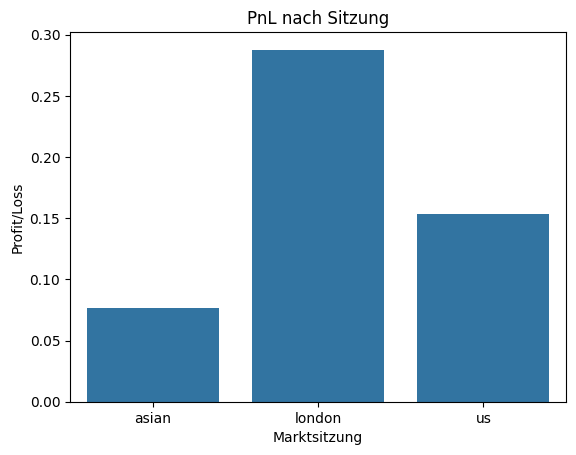

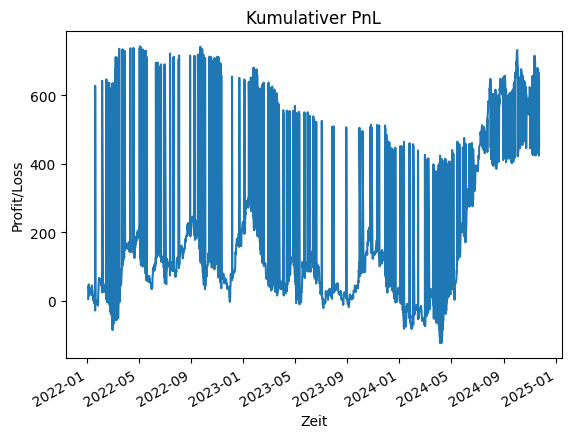

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# PnL pro Sitzung plotten
sns.barplot(data=trade_data, x='session', y='pnl', ci=None)
plt.title('PnL nach Sitzung')
plt.xlabel('Marktsitzung')
plt.ylabel('Profit/Loss')
plt.show()

# Zeitliche Entwicklung des kumulierten PnL
trade_data['cumulative_pnl'] = trade_data['pnl'].cumsum()
trade_data.set_index('exit_time')['cumulative_pnl'].plot()
plt.title('Kumulativer PnL')
plt.xlabel('Zeit')
plt.ylabel('Profit/Loss')
plt.show()


In [74]:
market_analyzer = market_analysis.MarketAnalysis(strategy_data)
market_analyzer.classify_regimes()
regime_metrics = market_analyzer.analyze_performance(trade_data)



Regime Classification Summary:
Total trades: 2520
uptrend: 1276 trades
Date range: 2022-01-11 - 2024-11-22
downtrend: 511 trades
Date range: 2022-01-03 - 2023-10-10
sideways: 733 trades
Date range: 2022-01-26 - 2024-11-19



Regime Classification Summary:
Total trades: 2520
uptrend: 1276 trades
Date range: 2022-01-11 - 2024-11-22
downtrend: 511 trades
Date range: 2022-01-03 - 2023-10-10
sideways: 733 trades
Date range: 2022-01-26 - 2024-11-19


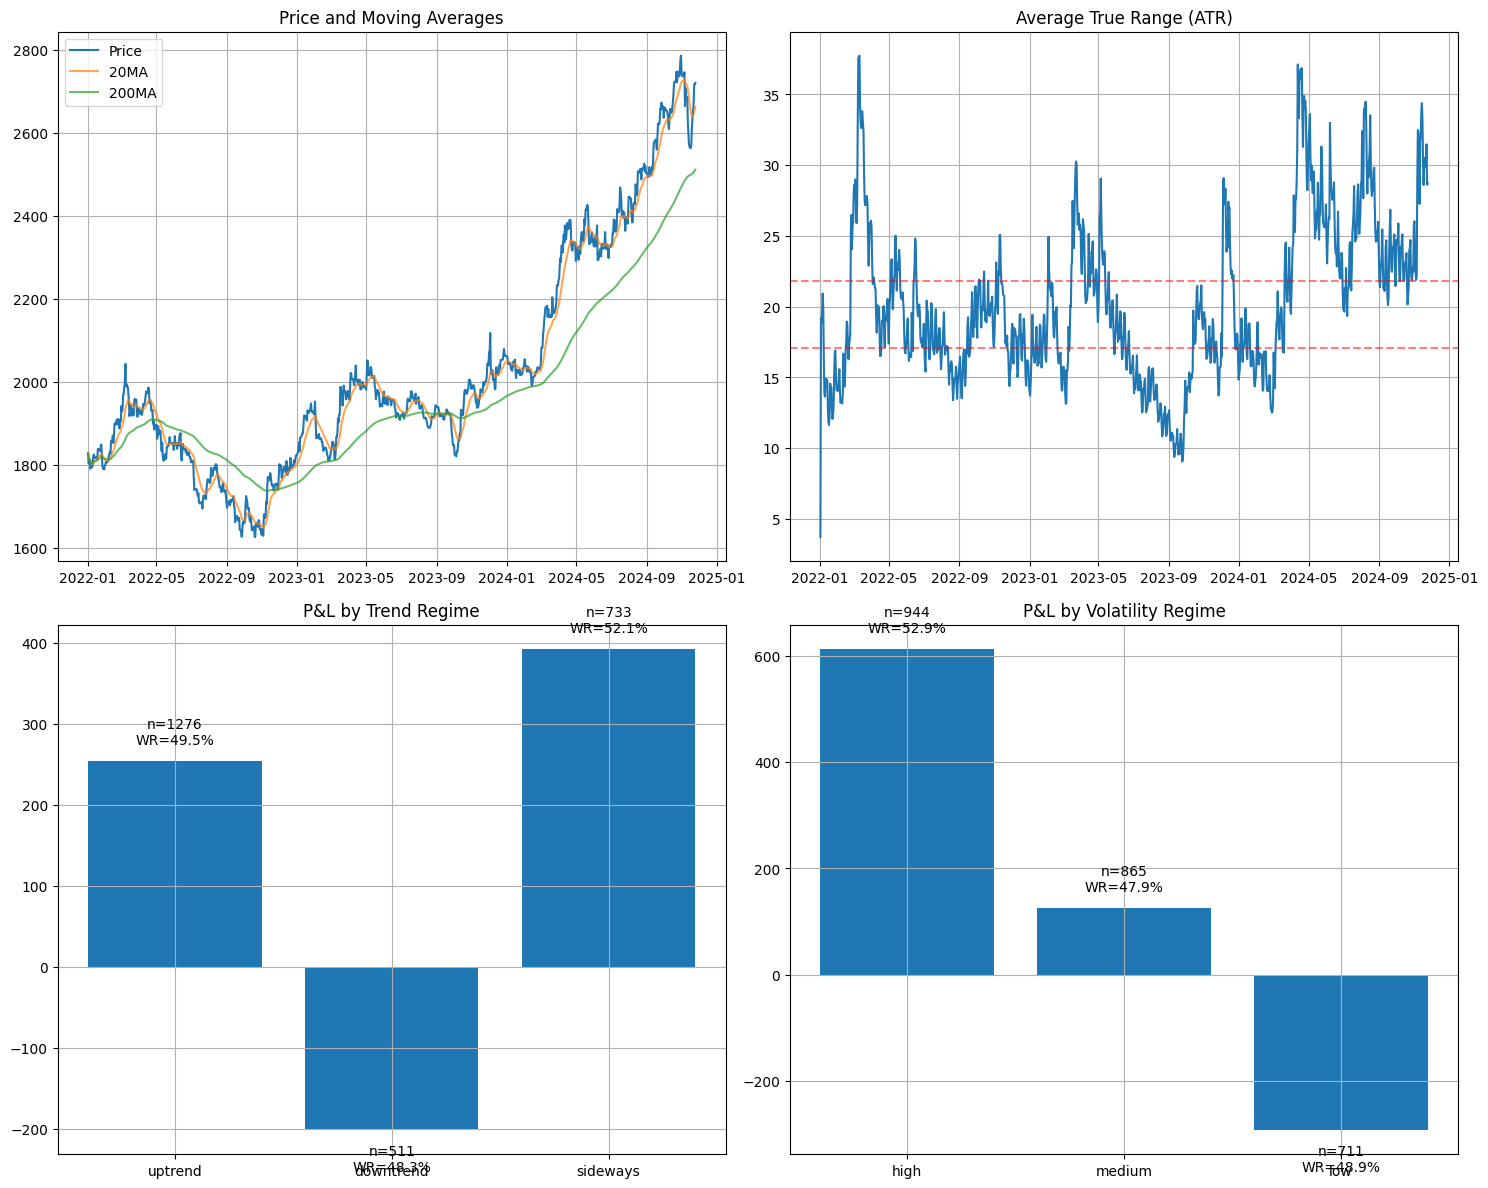

In [75]:
market_analyzer.plot_analysis(trade_data)


In [76]:
analyze_volume(combined_data)


Days with Zero Volume Periods:

Date: 2022-01-02
Minutes with zero volume: 1380
Sessions affected:
- Asian
- London
- US
Time range: 00:00:00 - 22:59:00

Date: 2022-01-03
Minutes with zero volume: 60
Sessions affected:
Time range: 22:00:00 - 22:59:00

Date: 2022-01-04
Minutes with zero volume: 60
Sessions affected:
Time range: 22:00:00 - 22:59:00

Date: 2022-01-05
Minutes with zero volume: 60
Sessions affected:
Time range: 22:00:00 - 22:59:00

Date: 2022-01-06
Minutes with zero volume: 60
Sessions affected:
Time range: 22:00:00 - 22:59:00

Date: 2022-01-07
Minutes with zero volume: 120
Sessions affected:
Time range: 22:00:00 - 23:59:00

Date: 2022-01-08
Minutes with zero volume: 1440
Sessions affected:
- Asian
- London
- US
Time range: 00:00:00 - 23:59:00

Date: 2022-01-09
Minutes with zero volume: 1380
Sessions affected:
- Asian
- London
- US
Time range: 00:00:00 - 22:59:00

Date: 2022-01-10
Minutes with zero volume: 60
Sessions affected:
Time range: 22:00:00 - 22:59:00

Date: 2022-0


=== Overall Performance ===
Strategy:
  Total PnL: $444.60
  Win Rate: 50.0%
  Avg Win: $8.40
  Avg Loss: $-8.07
  Sharpe Ratio: 0.44
  Profitable/Losing Days: 359/387

=== Session Analysis ===

ASIAN:
Number of Trades: 772
Average Duration: 451.8 minutes
Performance:
  Total PnL: $59.17
  Win Rate: 50.3%
  Avg Win: $5.88
  Avg Loss: $-5.79
  Sharpe Ratio: 0.16
  Profitable/Losing Days: 370/369

LONDON:
Number of Trades: 871
Average Duration: 388.1 minutes
Performance:
  Total PnL: $250.62
  Win Rate: 48.9%
  Avg Win: $10.06
  Avg Loss: $-9.08
  Sharpe Ratio: 0.42
  Profitable/Losing Days: 371/375

US:
Number of Trades: 877
Average Duration: 364.7 minutes
Performance:
  Total PnL: $134.81
  Win Rate: 51.0%
  Avg Win: $9.01
  Avg Loss: $-9.05
  Sharpe Ratio: 0.23
  Profitable/Losing Days: 393/353

=== Time Analysis ===
Best Day: 2022-03-08 ($52.50)
Worst Day: 2024-08-02 ($-94.71)

=== Re-entry Analysis ===

Attempt 1:
Performance:
  Total PnL: $637.60
  Win Rate: 50.3%
  Avg Win: $8.48

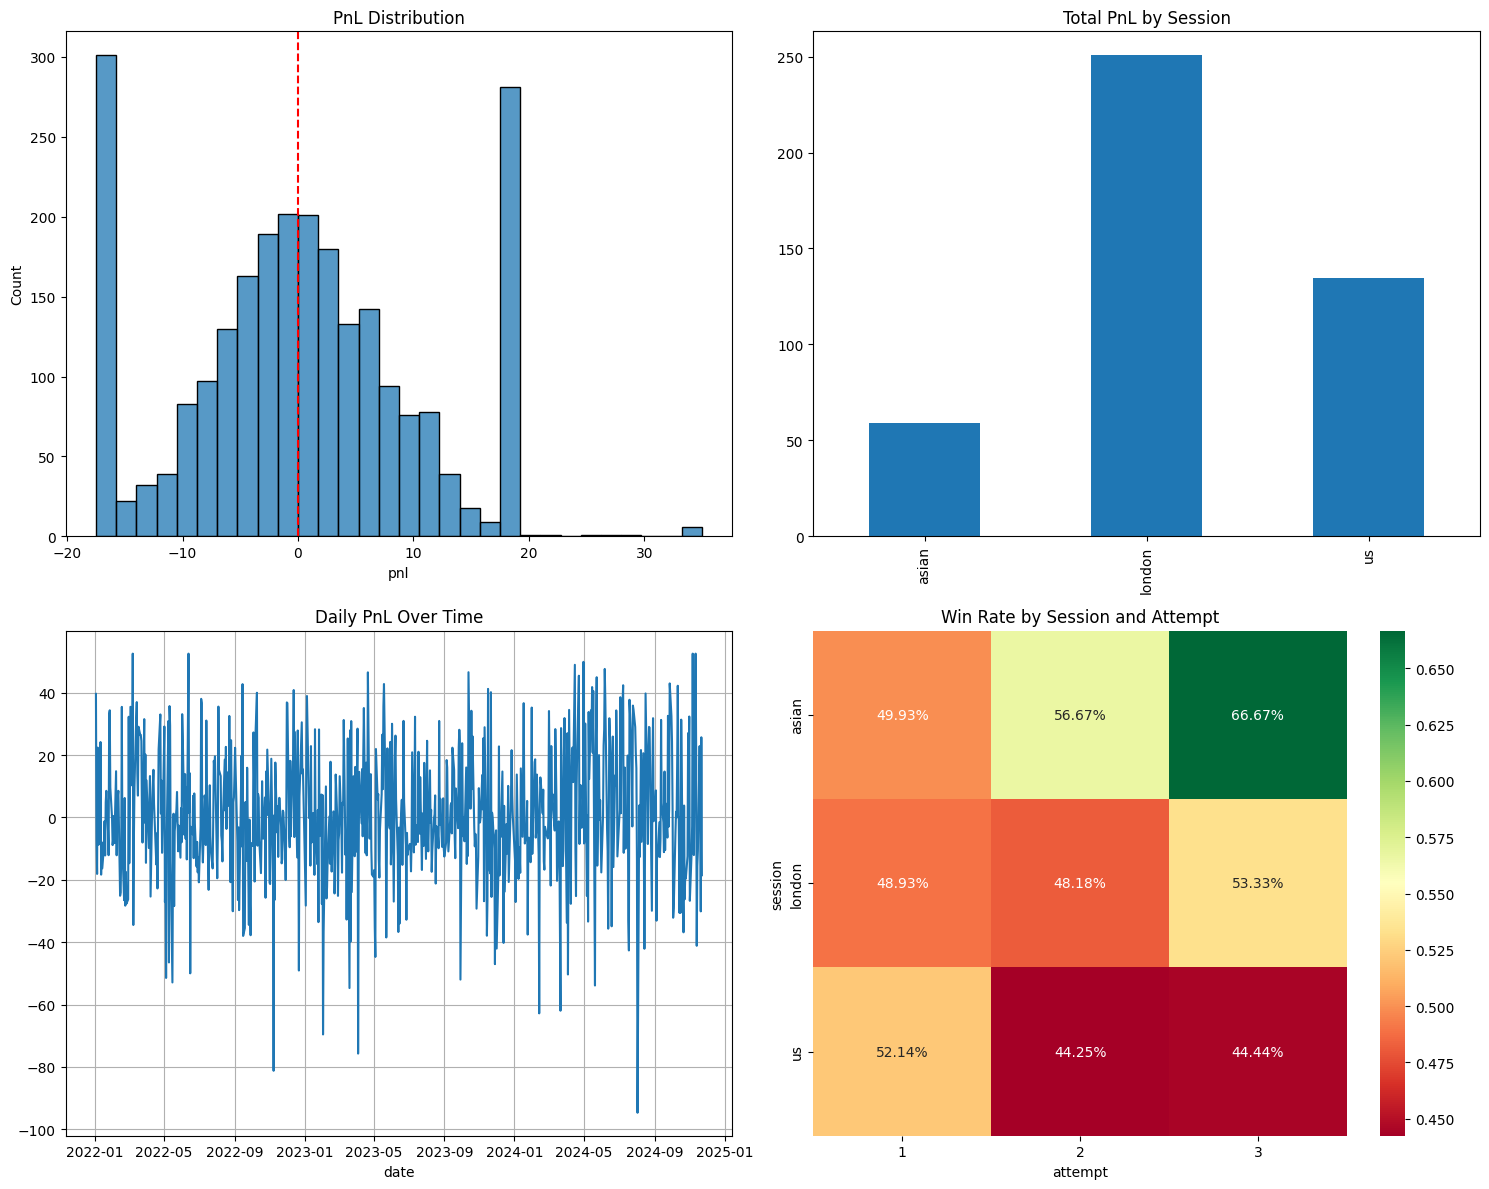

In [77]:
# Backtest ausführen
backtest = backtest.Backtest(strategy)
backtest.run_analysis()
backtest.print_summary()
backtest.plot_analysis()